In [1]:
#Imports & libraries
import torch
import torchvision
from torchvision import transforms, datasets

train = datasets.MNIST("", train=True, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST("", train=False, download=True,
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)


In [2]:
import torch.nn as nn 
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 64) #fc means fully connected
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) 

        
        
net = Net()
print(net)


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [3]:
X = torch.rand((28,28))
X = X.view(-1, 28*28)

output = net(X)
output

tensor([[-2.1579, -2.3995, -2.3854, -2.2859, -2.2151, -2.3065, -2.3189, -2.3496,
         -2.3855, -2.2504]], grad_fn=<LogSoftmaxBackward>)

In [4]:
import torch.optim as optim 

optimizer = optim.Adam(net.parameters(), lr=0.001)
EPOCHS = 3
for epoch in range(EPOCHS):
    for data in trainset:
        #data is a batch of features and labels
        X, y = data
        net.zero_grad()
        output = net(X.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step() #adjusts weights automatically
    print(loss)
        
        

tensor(0.0182, grad_fn=<NllLossBackward>)
tensor(0.0138, grad_fn=<NllLossBackward>)
tensor(0.0076, grad_fn=<NllLossBackward>)


In [5]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for index, i in enumerate(output):
            if torch.argmax(i) == y[index]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))
        


Accuracy:  0.98


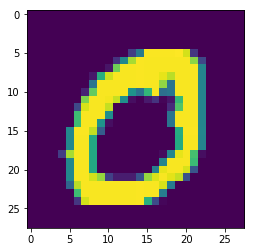

In [21]:
import matplotlib.pyplot as plt
plt.imshow(X[4].view(28,28))
plt.show()


In [22]:
print(torch.argmax(net(X[4].view(-1, 784))[0]))


tensor(0, grad_fn=<NotImplemented>)
